In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.cure import cure

In [2]:
X= pd.read_csv("C:/Users/casper/Desktop/mall.csv")

In [3]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
X=X.drop(['CustomerID','Gender'], axis = 1)

In [9]:
X.fillna(method ='ffill', inplace = True)
data=X

In [12]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized)

In [13]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
X=X_principal

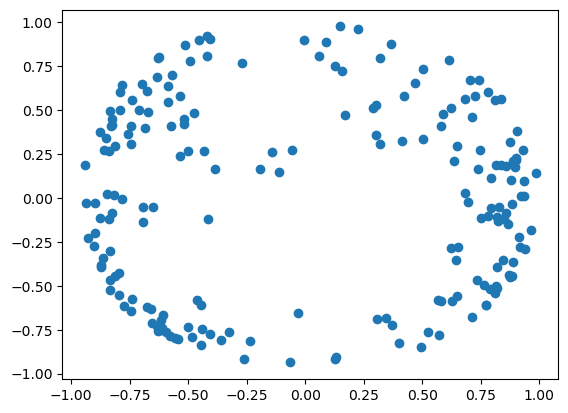

In [14]:
plt.scatter(X['P1'],X['P2'])

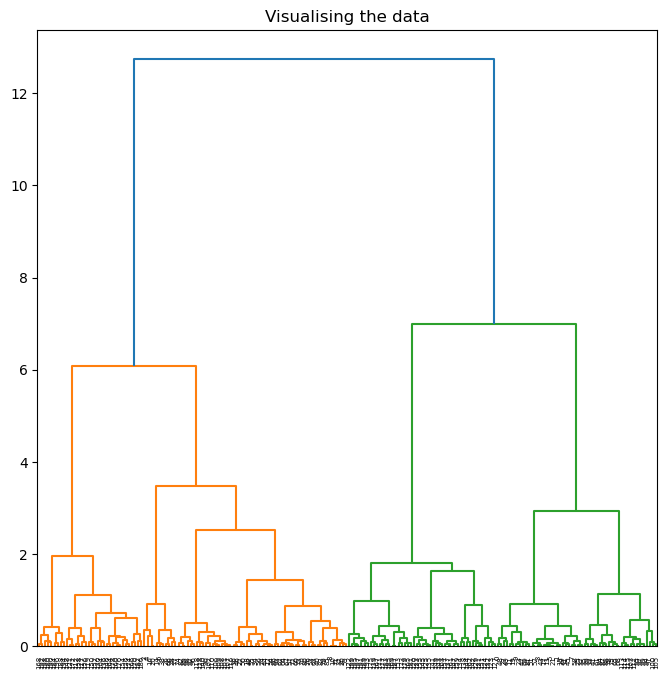

In [15]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

In [16]:
X=X.values.tolist()

In [17]:
number_cluster=2
number_represent_points=5
compression = 0.5

In [18]:
cure_instance=cure(X,number_cluster,number_represent_points,compression);
cure_instance.process();
clusters = cure_instance.get_clusters();

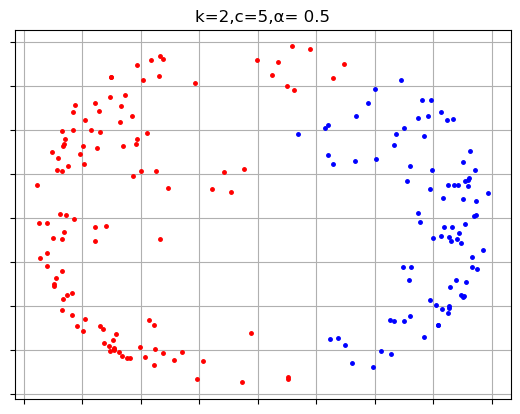

In [19]:
# Visualize allocated clusters.
visualizer = cluster_visualizer(titles=['k={},c={},α= {}'.format(number_cluster,number_represent_points,compression)]);
visualizer.append_clusters(clusters, X);
visualizer.show();

In [20]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score
silhouette_avg = silhouette_score(X, [i for i, cluster in enumerate(clusters) for _ in cluster])
davies_bouldin_index = davies_bouldin_score(X, [i for i, cluster in enumerate(clusters) for _ in cluster])
calinski_harabasz_index = calinski_harabasz_score(X, [i for i, cluster in enumerate(clusters) for _ in cluster])

In [21]:
print(" Cure Algoritmasında {} tane küme, {} tane temsil noktası ve daraltma katsayısı {} değeri için Silhouette Skoru  {:.5f}".format(number_cluster,number_represent_points, compression, silhouette_avg))
print(" Cure Algoritmasında {} tane küme, {} tane temsil noktası ve daraltma katsayısı {} değeri için Davies-Bouldin Endeks Değeri  {:.5f}".format(number_cluster,number_represent_points, compression, davies_bouldin_index))
print(" Cure Algoritmasında {} tane küme, {} tane temsil noktası ve daraltma katsayısı {} değeri için  Calinski-Harabasz Endeks Değeri  {:.5f}".format(number_cluster,number_represent_points, compression, calinski_harabasz_index))

 Cure Algoritmasında 2 tane küme, 5 tane temsil noktası ve daraltma katsayısı 0.5 değeri için Silhouette Skoru  0.31195
 Cure Algoritmasında 2 tane küme, 5 tane temsil noktası ve daraltma katsayısı 0.5 değeri için Davies-Bouldin Endeks Değeri  1.46158
 Cure Algoritmasında 2 tane küme, 5 tane temsil noktası ve daraltma katsayısı 0.5 değeri için  Calinski-Harabasz Endeks Değeri  81.75503


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_normalized)
clusters=[X_normalized[y_hc==i] for i in range(2)]
for i in clusters:
    print(i.shape)

(112, 3)
(88, 3)


C:\Users\casper\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


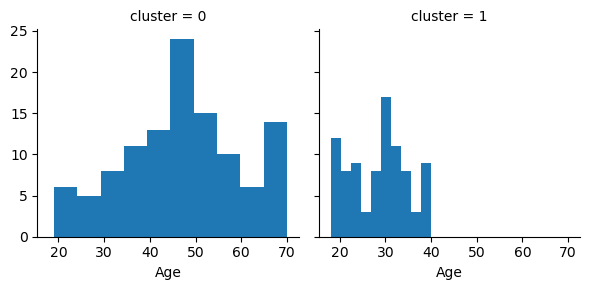

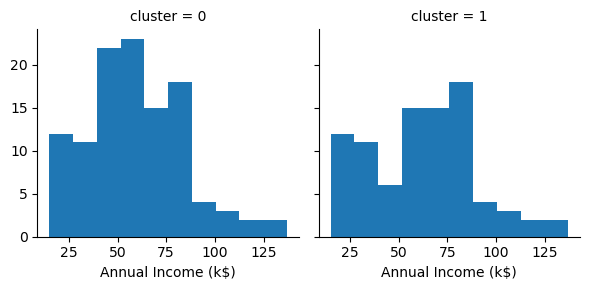

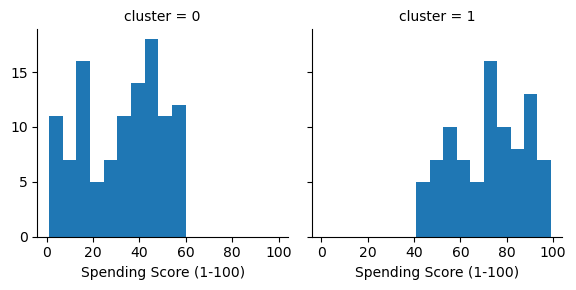

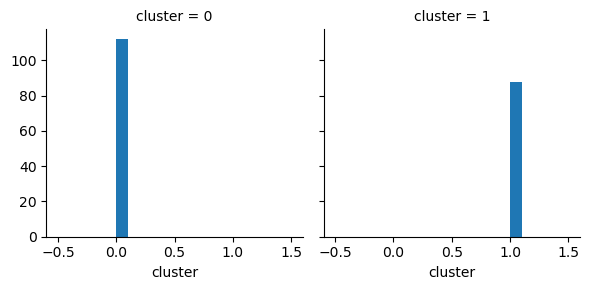

In [24]:
clusters=pd.concat([data, pd.DataFrame({'cluster':y_hc})], axis=1)
clusters.head()
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)